### Implementar el algoritmo Erdős–Rényi y Barabasi-Albert para generar una red libre de escala, para su implementación no es permitido utilizar librerías de redes, su implementación debe recibir los parámetros necesarios.


In [6]:
import csv
import random

# Función para leer el archivo CSV
def leer_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append((int(row[0]), int(row[1])))
    return data

# Cargar los datos del archivo CSV
file_path = 'ia-enron-only.csv'
data = leer_csv(file_path)

# Extraer los nodos únicos (primer elemento de cada par)
nodes = sorted(set([x[0] for x in data]))

# Erdős–Rényi (ER) Network Model
def erdos_renyi(nodes, p):
    graph = {i: [] for i in nodes}  # Inicializamos la red con nodos y sin aristas
    
    # Recorremos todos los pares de nodos
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)):
            if random.random() < p:
                graph[nodes[i]].append(nodes[j])
                graph[nodes[j]].append(nodes[i])  # Agregamos la arista en ambas direcciones (red no dirigida)
    
    return graph

# Barabási–Albert (BA) Network Model
def barabasi_albert(nodes, m):

    if m >= len(nodes):
        raise ValueError("El número de conexiones m debe ser menor que el número de nodos")
    
    graph = {i: [] for i in nodes[:m]}  # Comenzamos con los primeros m nodos iniciales completamente conectados
    
    # Conectamos los nodos iniciales completamente entre sí
    for i in range(m):
        for j in range(i + 1, m):
            graph[nodes[i]].append(nodes[j])
            graph[nodes[j]].append(nodes[i])

    # Lista de nodos con repetición en función de su grado (crecimiento preferencial)
    degree_list = [i for i in nodes[:m] for _ in range(len(graph[i]))]

    # Agregamos los siguientes nodos uno a uno
    for new_node in nodes[m:]:
        graph[new_node] = []  # Creamos el nuevo nodo
        connected_nodes = set()

        # Añadimos aristas a m nodos con preferencia por los nodos de mayor grado
        while len(connected_nodes) < m:
            potential_node = random.choice(degree_list)
            if potential_node not in connected_nodes:
                graph[new_node].append(potential_node)
                graph[potential_node].append(new_node)
                connected_nodes.add(potential_node)

                # Actualizamos la lista de grados
                degree_list.append(new_node)
                degree_list.append(potential_node)

    return graph

# Parámetros para los modelos
p = 0.1  # Probabilidad en el modelo ER
m = 3    # Número de conexiones en el modelo BA

# Generamos la red con el modelo Erdős–Rényi
er_network = erdos_renyi(nodes, p)

# Generamos la red con el modelo Barabási–Albert
ba_network = barabasi_albert(nodes, m)

# Para mostrar los resultados
def print_graph(graph):
    for node, neighbors in graph.items():
        print(f"Nodo {node}: {neighbors}")

print("Red generada con el modelo Erdős–Rényi:")
print_graph(er_network)

print("\nRed generada con el modelo Barabási–Albert:")
print_graph(ba_network)


Red generada con el modelo Erdős–Rényi:
Nodo 3: [17, 32, 38, 39, 40, 48, 57, 71, 76, 78, 104, 109, 114, 129, 130]
Nodo 4: [40, 43, 61, 76, 89, 91, 97, 99, 112, 116, 128, 129]
Nodo 9: [52, 53, 69, 71, 91, 100, 101, 104, 108, 127, 129, 143]
Nodo 11: [17, 38, 48, 57, 66, 86, 114, 115, 128, 141]
Nodo 12: [39, 65, 90, 99, 109, 112, 123, 134]
Nodo 13: [75, 77, 102, 115, 116, 135, 137, 138]
Nodo 16: [26, 29, 32, 34, 60, 61, 65, 67, 68, 71]
Nodo 17: [3, 11, 20, 27, 38, 41, 64, 68, 70, 81, 85, 95]
Nodo 19: [25, 63, 99, 100, 134]
Nodo 20: [17, 24, 40, 43, 61, 74, 75, 90, 102, 117, 123, 136, 141, 142]
Nodo 21: [22, 24, 66, 78, 109, 118, 120, 123, 134, 143]
Nodo 22: [21, 29, 40, 50, 51, 61, 63, 73, 77, 79, 136]
Nodo 24: [20, 21, 38, 49, 73, 78, 128, 132]
Nodo 25: [19, 27, 32, 40, 50, 81, 85, 139]
Nodo 26: [16, 31, 33, 53, 85, 90, 101, 114, 124, 127, 140]
Nodo 27: [17, 25, 49, 69, 83, 104, 108, 112, 130, 140]
Nodo 28: [53, 60, 82, 94, 103, 111, 114, 115, 117, 128, 132]
Nodo 29: [16, 22, 40, 49, 53,

### Crear redes con 500 nodos y un m=3, utilizando los algoritmos de la pregunta 1 y utilizando la librería NetworkX, comparar las métricas de longitud de camino medio y coeficiente de agrupamiento, mostrar también la gráfica de distribución de grado (Explicar los resultados).

Longitud de camino medio: 3.2397995991983968
Coeficiente de agrupamiento: 0.05298249205185296


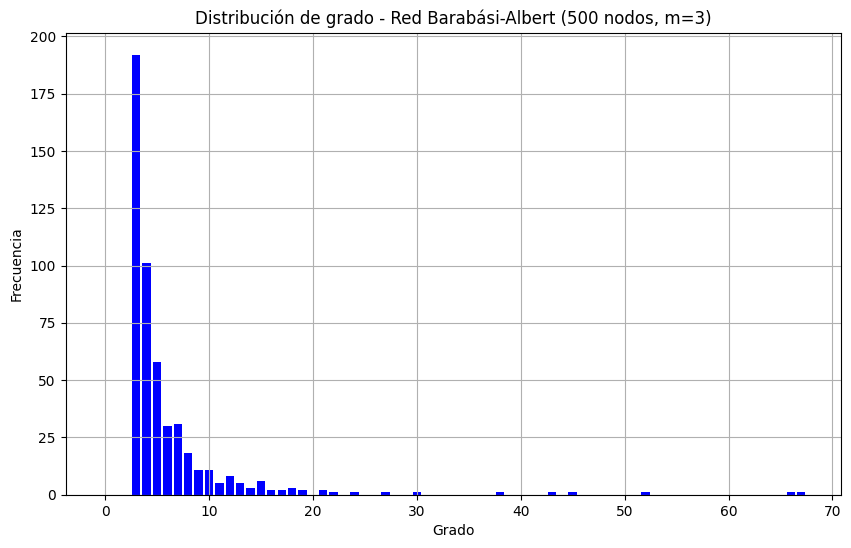

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Parámetros
n_nodes = 500 
m = 3  # Número de enlaces nuevos que cada nodo crea

# Generar la red usando el algoritmo de Barabási-Albert
ba_graph = nx.barabasi_albert_graph(n_nodes, m)

# Calcular métricas de la red
avg_path_length = nx.average_shortest_path_length(ba_graph)  # Longitud de camino medio
avg_clustering = nx.average_clustering(ba_graph)  # Coeficiente de agrupamiento

# Métricas
print(f"Longitud de camino medio: {avg_path_length}")
print(f"Coeficiente de agrupamiento: {avg_clustering}")

# Distribución de grado
degree_sequence = sorted([d for n, d in ba_graph.degree()], reverse=True)
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))

# Distribución de grado
plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, width=0.80, color='b')
plt.title("Distribución de grado - Red Barabási-Albert (500 nodos, m=3)")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


La gráfica muestra una red donde la mayoría de los nodos están débilmente conectados, mientras que unos pocos nodos actúan como hubs muy conectados. Esto es consistente con lo que se espera de las redes generadas mediante crecimiento preferencial, donde los nodos que ya tienen muchas conexiones son más propensos a atraer nuevos enlaces.

### Utilizando la librería Networkx analizar la red del dataset, calcular las métricas vistas en clase, en base al análisis verificar si la red es aleatoria, mundo pequeño y/o libre de escala (Justifique su respuesta)

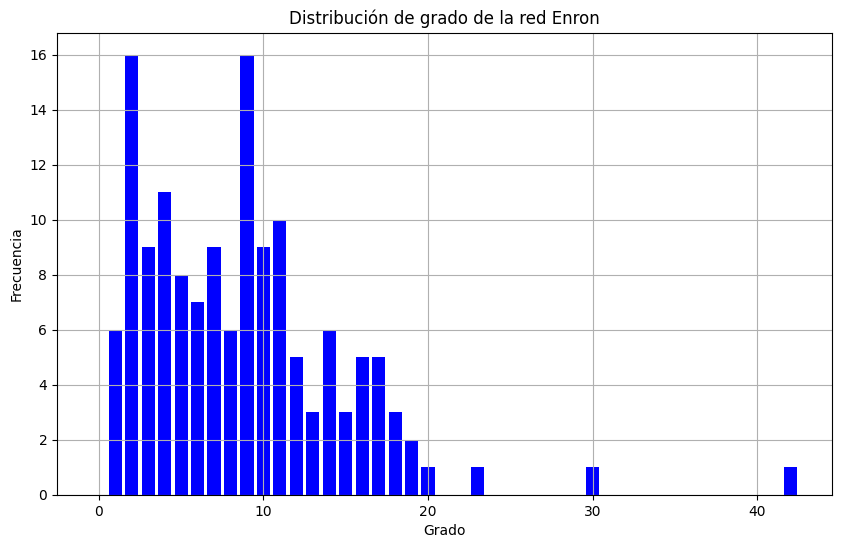

Longitud de camino medio: 2.967004826159756
Coeficiente de agrupamiento promedio: 0.4339070291479222
Diámetro de la red: 8
Transitivity (Coeficiente de agrupamiento global): 0.3590951932139491
Exponente ajustado para la ley de potencia (Red libre de escala): nan


C:\Users\magic\AppData\Local\Temp\ipykernel_26408\2871528571.py:53: RuntimeWarning: divide by zero encountered in log
  fit = np.polyfit(np.log(degrees[degrees > 0]), np.log(degree_count[degrees > 0]), 1)


In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset CSV
file_path = 'ia-enron-only.csv'  
edges = pd.read_csv(file_path, header=None)
edges = list(map(tuple, edges.values))  

# Crear el grafo utilizando NetworkX
G = nx.Graph()
G.add_edges_from(edges)

# Longitud de camino medio
if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
else:
    # Si la red no es conectada, tomar la componente más grande
    largest_component = max(nx.connected_components(G), key=len)
    G_largest = G.subgraph(largest_component)
    avg_path_length = nx.average_shortest_path_length(G_largest)

# Coeficiente de agrupamiento promedio
avg_clustering = nx.average_clustering(G)

# Diámetro de la red 
if nx.is_connected(G):
    diameter = nx.diameter(G)
else:
    diameter = nx.diameter(G_largest)

# Distribución de grado
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = np.bincount(degree_sequence)
degrees = np.arange(len(degree_count))

# Gráfica de la distribución de grado
plt.figure(figsize=(10, 6))
plt.bar(degrees, degree_count, width=0.80, color='b')
plt.title("Distribución de grado de la red Enron")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Ajustar la distribución de grado a una ley de potencia
degree_hist = np.array(degree_sequence)
fit = np.polyfit(np.log(degrees[degrees > 0]), np.log(degree_count[degrees > 0]), 1)

# Métrica de transitivity (global clustering coefficient)
transitivity = nx.transitivity(G)

# Métricas calculadas
print(f"Longitud de camino medio: {avg_path_length}")
print(f"Coeficiente de agrupamiento promedio: {avg_clustering}")
print(f"Diámetro de la red: {diameter}")
print(f"Transitivity (Coeficiente de agrupamiento global): {transitivity}")
print(f"Exponente ajustado para la ley de potencia (Red libre de escala): {fit[0]}")


* Mundo pequeño: La red presenta características claras de ser una red de mundo pequeño, dado que tiene una baja longitud de camino medio y un alto coeficiente de agrupamiento.
* Red aleatoria: La distribución de grado es bastante dispersa y no sigue una ley de potencia. Esto podría indicar que la red tiene características de una red aleatoria, donde los nodos no están altamente concentrados en hubs.
* No es libre de escala: Dado que no se puede ajustar una ley de potencia y no hay hubs dominantes en la red, podemos concluir que esta red no es libre de escala.